# Using Twitter API to get tweets



## Overview
In this notebook, we will use the Twitter API to get tweets. We will use the `twython` library to interact with the Twitter API.

* The first step is to create a Twitter Developer account and create an app to get the API key and API key secret.
* We will then load the credentials from a json file.(You need to create a json file named `.credentials` with the API key and API key secret and add it into the .gitignore file before pushing to a public repository, you can not share your credentials publicly)
* We will then use the `Twython` class to interact with the Twitter API.
* We will use the `search` method to search for tweets based on a query.
* 

## Install required packages
When using the `twython` library, you need to install the `twython` package. You can install it using the following command:
```bash
pip install twython
```

After installing the package, you can import the required libraries in the notebook.

In [12]:
# !pip install twython

## Import required libraries

In [13]:
from twython import Twython
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Load credentials from json file
You need to create a Twitter Developer account and create an app to get the API key and API key secret. Save these credentials in a json file named `.credentials` in the following format:
```json
{
    "API_KEY": "your_api_key
    "API_KEY_SECRET": "your_api_key
}
```

In [14]:

with open(".credentials", "r") as file:
    creds = json.load(file)

API_KEY = creds['API_KEY']
API_KEY_SECRET = creds['API_KEY_SECRET'] 
twitter = Twython(API_KEY, API_KEY_SECRET)

In [15]:
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_error_message',
 '_last_call',
 '_request',
 'access_token',
 'access_token_url',
 'add_list_member',
 'api_url',
 'api_version',
 'app_key',
 'app_secret',
 'authenticate_url',
 'client',
 'client_args',
 'construct_api_url',
 'create_block',
 'create_favorite',
 'create_friendship',
 'create_list',
 'create_list_members',
 'create_metadata',
 'create_mute',
 'create_place',
 'create_saved_search',
 'cursor',
 'delete',
 'delete_list',
 'delete_list_member',
 'delete_list_members',
 'destroy_block',
 'destroy_direct_message',
 'destroy_favorite',
 'destroy_friendship',
 'destroy_mute',
 'destroy_sa

## Search for tweets based on a query
We will use the `search` method to search for tweets based on a query. The `search` method takes the following parameters:
* `q`: The search query
* `result_type`: The type of results you want to get. It can be `mixed`, `recent`, or `popular`.    
* `count`: The number of tweets you want to get. The maximum value is 100.
* `lang`: The language of the tweets.
* `tweet_mode`: The mode of the tweet. It can be `extended` or `compat`.
* and many more.

In [16]:
query = 'Data Science'
# tweets = twitter.search(q=query, count=100, lang='en')


TwythonAuthError: Twitter API returned a 401 (Unauthorized), Could not authenticate you.

In [17]:
df = pd.read_csv('youtube.csv')

In [19]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [29]:
from textblob import TextBlob
def detect_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


<Axes: xlabel='sentiment'>

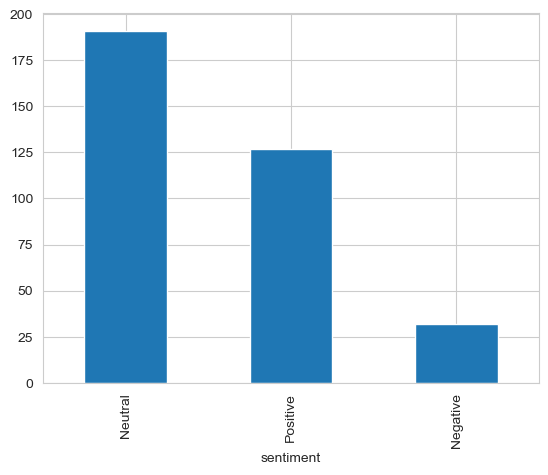

In [26]:
df['sentiment'] = df['CONTENT'].apply(detect_sentiment)
df['sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='sentiment', ylabel='count'>

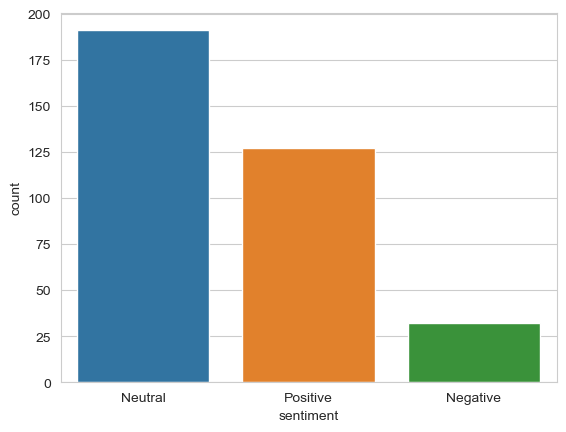

In [28]:
sns.countplot(x= df['sentiment'])

<Axes: xlabel='sentiment_score', ylabel='Count'>

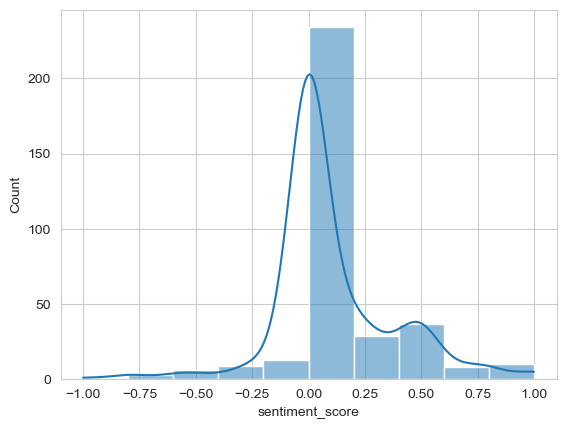

In [31]:
df['sentiment_score'] = df['CONTENT'].apply(get_sentiment_score)
sns.histplot(df['sentiment_score'], bins=10, kde=True)

In [34]:
df['sentiment_score'].describe()

count    350.000000
mean       0.105438
std        0.273811
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.200000
max        1.000000
Name: sentiment_score, dtype: float64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
def sentiment_analysis(score):
    if score > 0.2:
        return 1
    elif score < -0.2:
        return 2
    else:
        return 0